In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from tslearn.clustering import TimeSeriesKMeans

Function to rotate a matrix since when you are loading in a matrix from MATLAB the matrix is reversed in Python.

In [34]:
def rotate_matrix(m):
    return [[m[j][i] for j in range(len(m))] for i in range(len(m[0])-1,-1,-1)]

Load the MATLAB variables into the notebook. These are the three files of Dr. Richards running where fatigue, grade, and speed are varried.

In [35]:
fatigue = scipy.io.loadmat('stepOut_6.0_Fatigue_Dr. R_SM57_3-12-21_3S.mat')
grade = scipy.io.loadmat('stepOut_6.0_GradeVar0-5%_Dr. R_SM57_3-12-21_6S.mat')
speed = scipy.io.loadmat('stepOut_SpeedVar_Dr. R_SM57_3-12-21_4S.mat')
fatigue = fatigue['stepOut']
grade = grade['stepOut']
speed = speed['stepOut']
fatigue = rotate_matrix(fatigue)
grade = rotate_matrix(grade)
speed = rotate_matrix(speed)
# take the absolute value of sound wave
fatigue = np.absolute(fatigue)
grade = np.absolute(grade)
speed = np.absolute(speed)

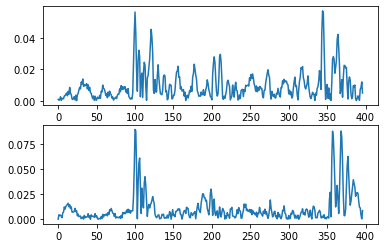

In [36]:
fig, axs = plt.subplots(2)
axs[0].plot(fatigue[0])
axs[1].plot(fatigue[1])
plt.show()

In [37]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

path = dtw.warping_path(fatigue[0], fatigue[1])
dtwvis.plot_warping(fatigue[0], fatigue[1], path, filename="warp.png")

(None, None)

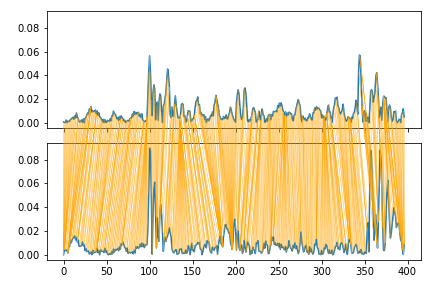

In [38]:
from IPython.display import Image
Image(filename='warp.png')

Train and fit the model using Dynamic Time Warping.

In [39]:
fatigue_model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
fatigue_model.fit(fatigue)
grade_model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10)
grade_model.fit(grade)
speed_model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10)
speed_model.fit(speed)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=4)

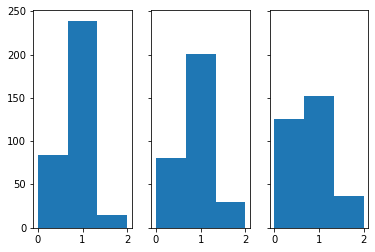

In [40]:
# Fatigue
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].hist(fatigue_model.labels_[0:338], bins=3)
axs[1].hist(fatigue_model.labels_[338:649], bins=3)
axs[2].hist(fatigue_model.labels_[649:len(model.labels_)], bins=3)
plt.show()

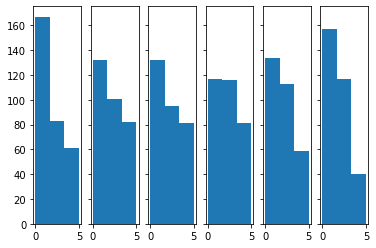

In [42]:
# Grade is 0,1,2,3,4,5
fig, axs = plt.subplots(1, 6, sharey=True)
axs[0].hist(grade_model.labels_[0:311], bins=3)
axs[1].hist(grade_model.labels_[311:626], bins=3)
axs[2].hist(grade_model.labels_[626:934], bins=3)
axs[3].hist(grade_model.labels_[934:1248], bins=3)
axs[4].hist(grade_model.labels_[1248:1554], bins=3)
axs[5].hist(grade_model.labels_[1554:1868], bins=3)
plt.show()

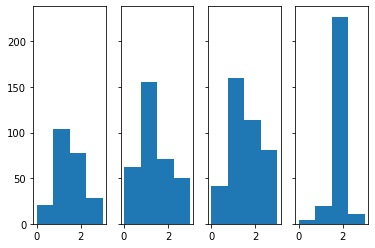

In [43]:
# Speed is 3.2,6,8,6
fig, axs = plt.subplots(1, 4, sharey=True)
axs[0].hist(speed_model.labels_[0:231], bins=4)
axs[1].hist(speed_model.labels_[231:569], bins=4)
axs[2].hist(speed_model.labels_[569:965], bins=4)
axs[3].hist(speed_model.labels_[965:1276], bins=4)
plt.show()